# LR1

### 1. Загрузка данных и отображение временного ряда

C:\Users\catne\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


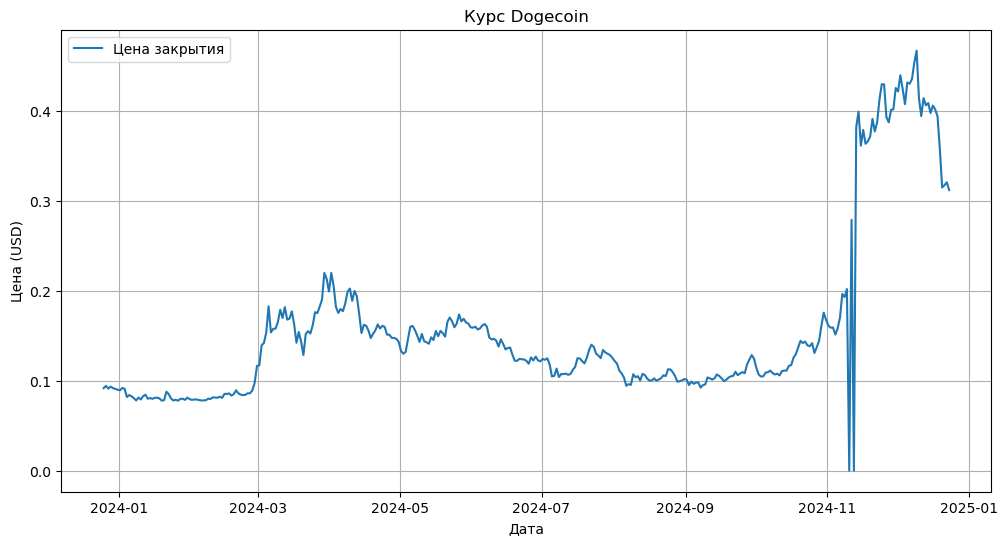

           timeOpen     timeClose      timeHigh       timeLow   priceOpen  \
count  3.650000e+02  3.650000e+02  3.650000e+02  3.650000e+02  365.000000   
mean   1.719144e+12  1.719230e+12  1.719184e+12  1.719185e+12    0.155757   
std    9.116121e+09  9.116121e+09  9.115505e+09  9.115367e+09    0.093020   
min    1.703419e+12  1.703506e+12  1.703471e+12  1.703502e+12    0.000000   
25%    1.711282e+12  1.711368e+12  1.711359e+12  1.711282e+12    0.101506   
50%    1.719144e+12  1.719230e+12  1.719223e+12  1.719229e+12    0.128089   
75%    1.727006e+12  1.727093e+12  1.727006e+12  1.727086e+12    0.161369   
max    1.734869e+12  1.734955e+12  1.734904e+12  1.734942e+12    0.467299   

        priceHigh    priceLow  priceClose        volume  
count  365.000000  365.000000  365.000000  3.650000e+02  
mean     0.162316    0.148756    0.155957  2.380478e+09  
std      0.098485    0.088027    0.092824  3.917122e+09  
min      0.000000    0.000000    0.000000  1.529078e+08  
25%      0.10430

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# Загрузка данных из Excel
data = pd.read_excel("dogecoin_data.xlsx")
data['timestamp'] = pd.to_datetime(data['timeClose'], unit='ms')
data.set_index('timestamp', inplace=True)

# Отображение графика временного ряда (цена закрытия)
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['priceClose'], label='Цена закрытия')
plt.xlabel('Дата')
plt.ylabel('Цена (USD)')
plt.title('Курс Dogecoin')
plt.legend()
plt.grid()
plt.show()
print(data.describe())

### 2. Построение скользящих средних с окнами 5, 10, 30, 50

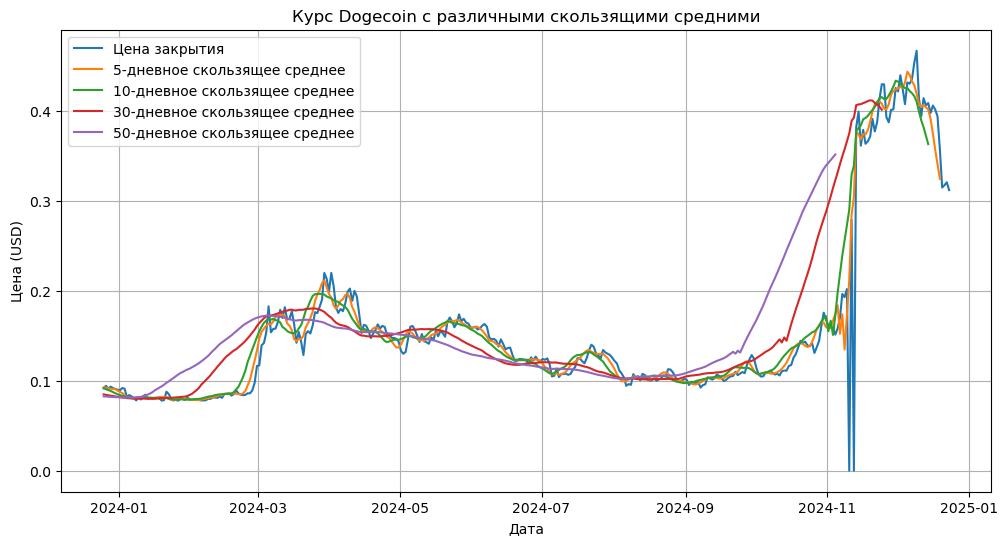

In [2]:
# Вычисление скользящих средних с окнами 5, 10, 30 и 50
rolling_mean_5 = data['priceClose'].rolling(window=5).mean()
rolling_mean_10 = data['priceClose'].rolling(window=10).mean()
rolling_mean_30 = data['priceClose'].rolling(window=30).mean()
rolling_mean_50 = data['priceClose'].rolling(window=50).mean()

# Построение графика с скользящими средними
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['priceClose'], label='Цена закрытия')
plt.plot(data.index, rolling_mean_5, label='5-дневное скользящее среднее')
plt.plot(data.index, rolling_mean_10, label='10-дневное скользящее среднее')
plt.plot(data.index, rolling_mean_30, label='30-дневное скользящее среднее')
plt.plot(data.index, rolling_mean_50, label='50-дневное скользящее среднее')
plt.xlabel('Дата')
plt.ylabel('Цена (USD)')
plt.title('Курс Dogecoin с различными скользящими средними')
plt.legend()
plt.grid()
plt.show()

### 3. Построение экспоненциальных скользящих средних с окнами 5, 10, 30, 50

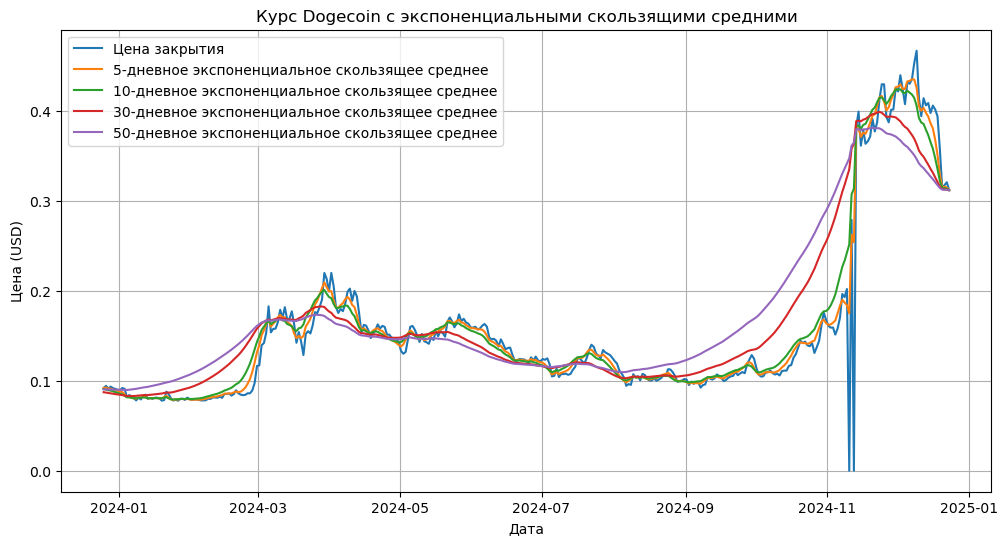

In [3]:
# Вычисление экспоненциальных скользящих средних с окнами 5, 10, 30 и 50
exp_rolling_mean_5 = data['priceClose'].ewm(span=5, adjust=False).mean()
exp_rolling_mean_10 = data['priceClose'].ewm(span=10, adjust=False).mean()
exp_rolling_mean_30 = data['priceClose'].ewm(span=30, adjust=False).mean()
exp_rolling_mean_50 = data['priceClose'].ewm(span=50, adjust=False).mean()

# Построение графика с экспоненциальными скользящими средними
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['priceClose'], label='Цена закрытия')
plt.plot(data.index, exp_rolling_mean_5, label='5-дневное экспоненциальное скользящее среднее')
plt.plot(data.index, exp_rolling_mean_10, label='10-дневное экспоненциальное скользящее среднее')
plt.plot(data.index, exp_rolling_mean_30, label='30-дневное экспоненциальное скользящее среднее')
plt.plot(data.index, exp_rolling_mean_50, label='50-дневное экспоненциальное скользящее среднее')
plt.xlabel('Дата')
plt.ylabel('Цена (USD)')
plt.title('Курс Dogecoin с экспоненциальными скользящими средними')
plt.legend()
plt.grid()
plt.show()

### 4. Прогноз на основе EMA (5 периодов вперед)

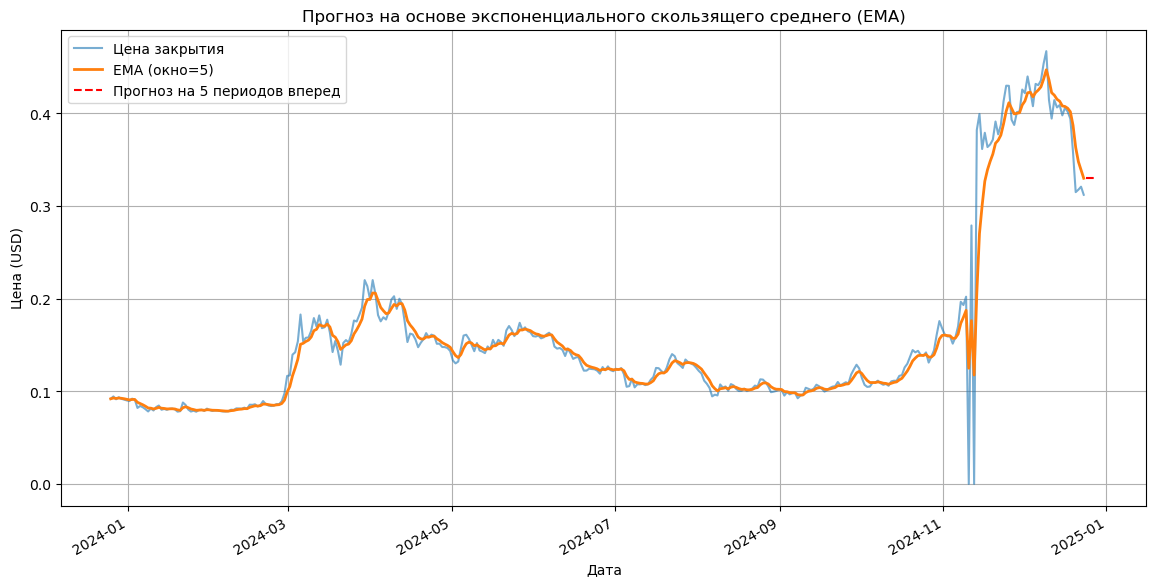

In [61]:
data['timestamp'] = pd.to_datetime(data['timeClose'], unit='ms')

# Установка индекса по столбцу 'timestamp'
data.set_index('timestamp', inplace=True)

# Вычисление экспоненциального скользящего среднего с окнами 5
data['EMA_5'] = data['priceClose'].ewm(span=5, adjust=False).mean()

from statsmodels.tsa.holtwinters import ExponentialSmoothing
data = data.sort_index()  # Сортировка данных по времени
data = data.asfreq('D')  # Установка частоты по дням (если частота данных - дневная)

# Применение модели экспоненциального сглаживания
model = ExponentialSmoothing(data['EMA_5'], trend=None, seasonal=None, seasonal_periods=None)
fit = model.fit()

# Прогноз на 5 периодов вперед
forecast = fit.forecast(steps=5)

# Создание будущих дат для прогноза
future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=5, freq='D')

# Построение графика исходных данных, EMA и прогноза
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['priceClose'], label='Цена закрытия', alpha=0.6)
plt.plot(data.index, data['EMA_5'], label='EMA (окно=5)', linewidth=2)
plt.plot(future_dates, forecast, label='Прогноз на 5 периодов вперед', linestyle='--', color='red')

# Настройка графика
plt.xlabel("Дата")
plt.ylabel("Цена (USD)")
plt.title("Прогноз на основе экспоненциального скользящего среднего (EMA)")
plt.legend()
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()



### 5. Выводы

На основе графиков и анализа видно:

1. Тренд цены Dogecoin за выбранный период.
2. Влияние параметра окна на сглаживание данных.
3. Экспоненциальное скользящее среднее лучше отражает последние изменения в данных.
4. Прогноз на основе EMA показывает ожидаемую цену в краткосрочной перспективе.